This notebook is used to answer the Questions for Airbnb Accomodations in Amsterdam and i will be using the CRISP-DM approach to answer some questions. 

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Business Understanding - Airbnb accomodations in Amsterdam.

We will be looking into the Airbnb data to get a better understanding of the Airbnb accomodations listed in Amsterdam. We are interested to understand the data in order to answer the following questions.

What is the most popular neighborhood to stay in Amsterdam?
What is the average price/night for Airbnb in Amsterdam?
What factors influence the price of Airbnb accommodation in Amsterdam?
To answer these questions, the features that are of particular interest for us are 'neighbourhood group', 'room type' and 'price'.

# Loading Airbnb Data Set

We are now going to load the data set provided by Airbnb for its accomodations in Amsterdam.

In [2]:
listing = pd.read_csv('listings.csv') #reading the listings dataset in a datafram called 'listing'

# Data Understanding

To understand the data we are going to have a look into the different features present in the data set and then identify which features are relevant for answering our question.

In [3]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.04,1,158
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.44,1,17
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.72,2,31
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.17,1,212
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,217,2020-03-02,2.12,1,235


In [4]:
listing.shape

(19352, 16)

# Question 1: What is the most popular neighborhood to stay in Amsterdam?

### Data preparation and validation

In [5]:
#Column names with null or NAN values
listing.columns[listing.isnull().any()] 

Index(['name', 'host_name', 'neighbourhood_group', 'last_review',
       'reviews_per_month'],
      dtype='object')

In [6]:
#To check if 'neighbourhood_group' has any null or NAN values or not. Mean of 0.0 means it has no missing (null or NAN) value
listing['neighbourhood'].isnull().mean() 

0.0

In [7]:
#Displaying total number of occurences for each neighbourhood type
listing['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    3252
De Pijp - Rivierenbuurt                   2404
Centrum-West                              2152
Centrum-Oost                              1668
Westerpark                                1448
Zuid                                      1382
Oud-Oost                                  1264
Bos en Lommer                             1102
Oostelijk Havengebied - Indische Buurt     949
Oud-Noord                                  574
Watergraafsmeer                            561
IJburg - Zeeburgereiland                   465
Slotervaart                                411
Noord-West                                 387
Noord-Oost                                 266
Buitenveldert - Zuidas                     247
Geuzenveld - Slotermeer                    220
De Aker - Nieuw Sloten                     138
Gaasperdam - Driemond                      125
Osdorp                                     123
Bijlmer-Centrum                            113
Bijlmer-Oost 

Now i would like to create a dictionary with the total number of reviews for each neighbourhood.

In [8]:
#saving all the names of the neighbourhoods
neighbourhood_names = np.array(listing['neighbourhood'].value_counts().index)

In [9]:
# Displaying the neighbourhood_names array
neighbourhood_names

array(['De Baarsjes - Oud-West', 'De Pijp - Rivierenbuurt',
       'Centrum-West', 'Centrum-Oost', 'Westerpark', 'Zuid', 'Oud-Oost',
       'Bos en Lommer', 'Oostelijk Havengebied - Indische Buurt',
       'Oud-Noord', 'Watergraafsmeer', 'IJburg - Zeeburgereiland',
       'Slotervaart', 'Noord-West', 'Noord-Oost',
       'Buitenveldert - Zuidas', 'Geuzenveld - Slotermeer',
       'De Aker - Nieuw Sloten', 'Gaasperdam - Driemond', 'Osdorp',
       'Bijlmer-Centrum', 'Bijlmer-Oost'], dtype=object)

In [10]:
#Creating a function to create a list of sum of reviews for each neighbourhood.

#List to store the sum of each neighbourhood
sum_reviews = []

def sum_of_reviews(neighbourhood_names):
    
    #Write documentation here
    
    for name in neighbourhood_names:
        
        #sotring the sum of reviews for each 'name' in 'neighbourhood_names' array
        sum_reviews.append(listing.loc[listing['neighbourhood'] == name ]['number_of_reviews'].sum())
        
    return sum_reviews
    

In [11]:
#Saving the output of the 'sum_of_reviews' function in the list 'sum_reviews'
sum_reviews = sum_of_reviews(neighbourhood_names)

In [12]:
#Displaying the list
sum_reviews

[72038,
 53661,
 89553,
 56471,
 31171,
 28530,
 24492,
 21024,
 19590,
 15540,
 9847,
 8294,
 9150,
 9260,
 6269,
 4161,
 4628,
 5433,
 4148,
 3213,
 3169,
 2699]

In [13]:
#Creting a dictionary to store the names of each neighbourhood along with their total sum fo reviews.
dic_reviews = {}
#neighbourhood_names
for idx, name in enumerate(neighbourhood_names):
    dic_reviews[name] = sum_reviews[idx]

In [14]:
dic_reviews

{'De Baarsjes - Oud-West': 72038,
 'De Pijp - Rivierenbuurt': 53661,
 'Centrum-West': 89553,
 'Centrum-Oost': 56471,
 'Westerpark': 31171,
 'Zuid': 28530,
 'Oud-Oost': 24492,
 'Bos en Lommer': 21024,
 'Oostelijk Havengebied - Indische Buurt': 19590,
 'Oud-Noord': 15540,
 'Watergraafsmeer': 9847,
 'IJburg - Zeeburgereiland': 8294,
 'Slotervaart': 9150,
 'Noord-West': 9260,
 'Noord-Oost': 6269,
 'Buitenveldert - Zuidas': 4161,
 'Geuzenveld - Slotermeer': 4628,
 'De Aker - Nieuw Sloten': 5433,
 'Gaasperdam - Driemond': 4148,
 'Osdorp': 3213,
 'Bijlmer-Centrum': 3169,
 'Bijlmer-Oost': 2699}

In [15]:
#Testing the code logic 
#listing.loc[listing['neighbourhood'] == 'De Baarsjes - Oud-West' ]['number_of_reviews'].sum()

In [16]:
#Changing the dictionary to dataframe for ease of plotting
sum_reviews_df = pd.DataFrame(list(dic_reviews.items()), columns = ['neighbourhood', 'sum_of_reviews'])

In [17]:
#Sorting the values with the most number of reviews being the first.
sum_of_reviews_df = sum_reviews_df.sort_values(by = ['sum_of_reviews'], ascending = False)

In [18]:
sum_of_reviews_df.head()

,neighbourhood,sum_of_reviews
2,Centrum-West,89553
0,De Baarsjes - Oud-West,72038
3,Centrum-Oost,56471
1,De Pijp - Rivierenbuurt,53661
4,Westerpark,31171


### Visual data representation

Text(0.5,1,'Total number of Airbnb properties offered in different neighborhoods in Amsterdam')

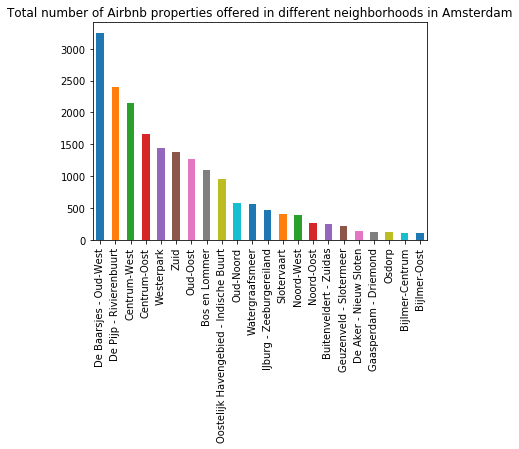

In [19]:
# Plot of Airbnb in different neighborhood
listing['neighbourhood'].value_counts().plot(kind='bar')

#assigning title to our plot
plt.title('Total number of Airbnb properties offered in different neighborhoods in Amsterdam') 

Text(0.5,1,'Percentage of Airbnb properties offered in different neighborhoods in Amsterdam')

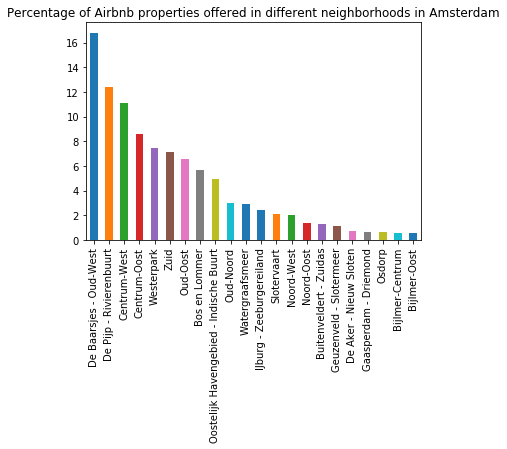

In [20]:
#This line of code is used to plot the percentage of different neighbourhood groups in Amsterdam. 
#'normalize=True' in value_counts() returns the values as percentages. 
popular_neighborhood = (listing['neighbourhood'].value_counts(normalize = True) * 100).plot(kind='bar')

# Percentage of Airbnb in different neighborhood
plt.title('Percentage of Airbnb properties offered in different neighborhoods in Amsterdam') 

In [21]:
#Displaying different types neighbourhood groups as a percentage.
listing['neighbourhood'].value_counts(normalize=True) *100

De Baarsjes - Oud-West                    16.804465
De Pijp - Rivierenbuurt                   12.422489
Centrum-West                              11.120298
Centrum-Oost                               8.619264
Westerpark                                 7.482431
Zuid                                       7.141381
Oud-Oost                                   6.531625
Bos en Lommer                              5.694502
Oostelijk Havengebied - Indische Buurt     4.903886
Oud-Noord                                  2.966102
Watergraafsmeer                            2.898925
IJburg - Zeeburgereiland                   2.402852
Slotervaart                                2.123811
Noord-West                                 1.999793
Noord-Oost                                 1.374535
Buitenveldert - Zuidas                     1.276354
Geuzenveld - Slotermeer                    1.136833
De Aker - Nieuw Sloten                     0.713105
Gaasperdam - Driemond                      0.645928
Osdorp      

So from the above plots, we can conclude that neighbourhood groups like 'De Baarsjes - Oud-West', 'De Pijp - Rivierenbuurt', 'Centrum-West', 'Westerpark' and 'Centrum-Oost' are very popular. These are the neighbourhoods where most of the Airbnb locations are being offered. More than 50% of all the Airbnb hostings are located in these five neighbourhoods but here we did not take into consideration the total number of reviews for each neighbourhood. We can improve our results by taking into account the number of reviews for each neighbourhood which will tell us how many people stayed in those Airbnb Accomodations and hence we can then conclude that those with the highest number of reviews are the most popular areas because most people stayed there. 

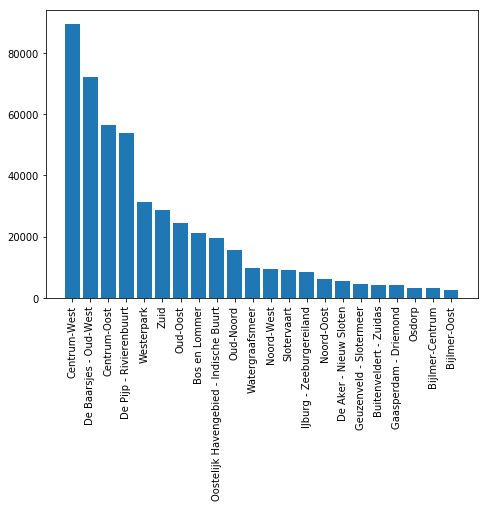

In [22]:
#Plotting the sum of reviews for each neighbourhood.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = sum_of_reviews_df['neighbourhood'].values
sum_values = sum_of_reviews_df['sum_of_reviews'].values
ax.bar(names, sum_values)
plt.xticks(rotation=90)
plt.show()

### Conclusion

So from the plot it turned out that the neighbourhoods like 'Centrum-West', 'De Baarsjes - Oud-West', 'Centrum-West' and 'De Pijp - Rivierenbuurt' are the most popular neighbourhoods for Airbnb accomodations in Amsterdam because these neighbourhoods have the highest number of reviews. 

This shows that if we start digging deep and if we consider different attributes then we can better undertand the relationship between the attributes and ot can help us in answering questions in a more precise way. For example, i proved from the above exaple that if we consider number of reviews attribute then our results of the most popular neighbourhood changes.

Here i would like to mention that we could have taken into consideration the reviews themselves to better understand if the guests liked the accomodation or not but that reuqires techniques like NLP (Naturual Language Processing) which i did want to go into. 

# Question 2: What is the average price/night for Airbnb in Amsterdam?

What is the preferred type of property of Airbnb in Amsterdam based on the price distribution per 'room_type' of Airbnb in Amsterdam. Here in this question we will show the comparison between plotting the mean and the median value.

### Data preparation and validation

In [23]:
#Checking if the 'room_type' column contains any NaN values
listing['room_type'].isnull().mean()

0.0

In [24]:
#Checking if the 'price' column contains any NaN values
listing['price'].isnull().mean()

0.0

In [25]:
#Checking no. of different type of rooms types in Airbnb Amsterdam
different_room_types = listing['room_type'].value_counts()
different_room_types

Entire home/apt    15107
Private room        3918
Hotel room           267
Shared room           60
Name: room_type, dtype: int64

In [26]:
#print the index number of the max value in column 'price' (use just .max() to print only the max value in the column)
listing['price'].idxmax()

120

In [27]:
#Printing the max value of price.
listing['price'].max()

9000

In [28]:
#Code to print the details of the price depending on the 'room_type' 
listing.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,15107.0,173.214007,145.028922,5.0,110.0,149.0,200.00,8000.0
Hotel room,267.0,244.138577,205.317322,20.0,135.0,190.0,275.00,1285.0
Private room,3918.0,132.246810,436.244131,10.0,68.0,88.0,120.00,9000.0
Shared room,60.0,184.500000,271.623025,17.0,50.0,67.5,157.75,1000.0


In [29]:
#Code to print the row with max price (print entire row at that index number)
print(listing.loc[listing['price'].idxmax()])

id                                                             286500
name                              Center,Canal View, Private Bathroom
host_id                                                       1491565
host_name                                                       David
neighbourhood_group                                               NaN
neighbourhood                                            Centrum-West
latitude                                                      52.3756
longitude                                                         4.9
room_type                                                Private room
price                                                            9000
minimum_nights                                                      3
number_of_reviews                                                 275
last_review                                                2020-03-06
reviews_per_month                                                 2.7
calculated_host_list

### Visual data representation

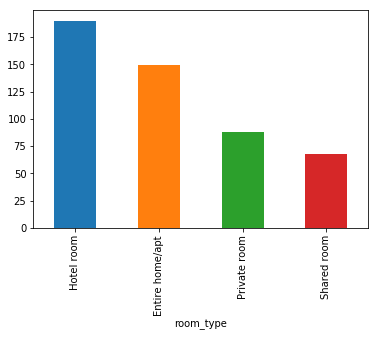

In [30]:
# This plot shows the median price of room type of Airbnb in Amsterdam
Amsterdam_Median_plot = listing.groupby('room_type').price.median().sort_values(ascending=False).plot(kind='bar')
Amsterdam_Median_plot

In [31]:
#printing the Median values 
Amsterdam_Median_values= listing.groupby('room_type').price.median().sort_values(ascending=False)
Amsterdam_Median_values

room_type
Hotel room         190.0
Entire home/apt    149.0
Private room        88.0
Shared room         67.5
Name: price, dtype: float64

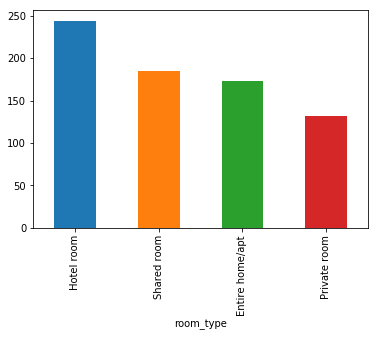

In [32]:
# This plot shows the mean price of room type of Airbnb in Amsterdam
Amsterdam_Mean_plot = listing.groupby('room_type').price.mean().sort_values(ascending=False).plot(kind='bar')
Amsterdam_Mean_plot

In [33]:
#Printing the Mean values
Amsterdam_Mean_values = listing.groupby('room_type').price.mean().sort_values(ascending=False)
Amsterdam_Mean_values

room_type
Hotel room         244.138577
Shared room        184.500000
Entire home/apt    173.214007
Private room       132.246810
Name: price, dtype: float64

### Conclusion for Question 2

So from the above comparison we can see that Mean and Median can have different effects on the overall values. Sometimes taking the mean of all the values to represent the average might be a good idea and sometimes taking Median is a better approach. From this example, we saw that when we take the Mean of all the price values of room_type 'Shared room', it shows a very high number because there there will be Shared rooms which costs alot more per night. These kinds of values are outliers and they disturb the overall outcome and that is why we saw a very high mean value. On the other hand taking Median proved to be a better approach because it sorts all the values in the ascending manner and takes the middle value, which in this case, is a better representation of the average price. So to conclude, we can say that based on the scenario, we have to decide what is a better aproach to represent the average.

# Question 3: What factors influence the price of Airbnb accommodation in Amsterdam?

In this notebook, we will create a Linear Regression Model to predict the features that influence the price but before we proceed we need to prepare our data so that it can be used by our model. We want to know what features are directly related to the price. We will also perform data cleaning and data wrangling operations before the data can be fed into the model for prediction.

## Correlation of features.


In order to prepare the data for our model, I dediced to plot a correlation graph to see how different feautres are coorelated to each other. Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

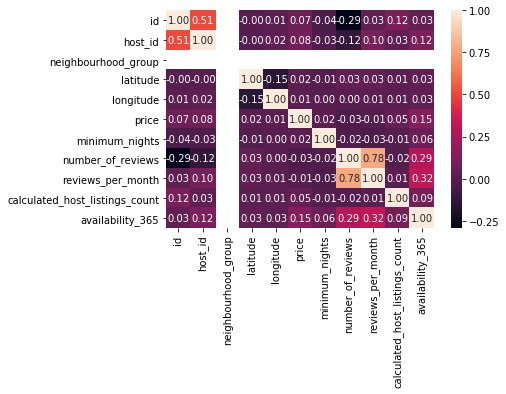

In [34]:
sns.heatmap(listing.corr(), annot=True, fmt=".2f");

After observing the graph above, it is clear that the feautres are mostly independant of each other. Some features that are more correlated to each other are, for example, 'availability_365', 'number_of_reviews' and 'reviews_per_month'.
Now let us proceed with the data preparation where we will remove feautres are not numeric and those that we think would not be helpful. 

### Data preparation for modelling

In [35]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the features you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no price
    2. Create X as all the columns that are not the price column and that are numeric
    3. Create y as the price column
    4. Drop the 'id', 'name', 'host_id', 'host_name','neighbourhood_group', 'latitude', 'longitude', 'price',
                'last_review','calculated_host_listings_count', 'availability_365' columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    7. Return X and y
    '''
    
    #Drop all the rows with no price
    df = df.dropna(subset = ['price'], axis = 0)
    y = df['price']
    
    #Drop columns that we do not want to consider 
    df = df.drop(['id', 'name', 'host_id', 'host_name',
                  'neighbourhood_group', 'latitude', 'longitude', 'price',
                  'last_review', 'reviews_per_month', 'calculated_host_listings_count', ], axis = 1)
    
    
    #Fill the mean in the columns where we have some NaN values.
    num_vars = df.select_dtypes(include = ['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace = True)
        
        
    #Fill Dummy variables for the categorical columns. 
    cat_vars = df.select_dtypes(include = ['object']).copy().columns
    for var in cat_vars:
        df = pd.concat([df.drop(var, axis = 1), pd.get_dummies(df[var], prefix =var, prefix_sep='_', drop_first=False)], axis = 1)
        
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listing)

In [36]:
X.head()

,minimum_nights,number_of_reviews,availability_365,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3,278,158,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,55,17,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,340,31,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14,5,212,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,217,235,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Data Modelling

Now that we have clean data available, we need to perform data modelling to make sure that data is in the form that is suitable for training and testing our model.

##### Splitting data into training and testing data sets.

In [37]:
#Create Training and Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating the ADABoost Model

In [38]:
#ADA BOOST

param_dist = {
 'n_estimators': [500, 2000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }



adamodel = RandomizedSearchCV(AdaBoostRegressor(), param_distributions = param_dist, cv=3, n_iter = 20, n_jobs=-1);
                              
adamodel.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [500, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

## ADABoost Model Evaluation

In [39]:
#Predictions
y_pred_ada = adamodel.predict(X_test)


In [40]:
#Scoring the model
r2_score(y_test, y_pred_ada)

0.05589702234455818

## Creating the Linear Regression Model

In [41]:
#Instantiat the Model
lm_model = LinearRegression(normalize=False)

#### Fitting the model with train and test data sets

In [42]:
#Fit the Model

lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Linear Regression Model Evaluation

The steps below help us evaluate the performance of our model.

In [43]:
#Predictions
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [44]:
#Scoring the Model

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [45]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.05498088475105323.  The rsquared on the test data was 0.043193392502388295.


In [46]:
#Add more models here like 'SVM' and 'RandomForest'

## Creating the Linear RandomForest Model

In [54]:
# setting the parameters and then fitting the model
param_dist = {"max_depth": randint(3,15),
              "n_estimators" : [100, 1000],
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "min_samples_leaf" : randint(1,10)
                            }
n_iter_search = 30
randommodel = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
randommodel.fit(X_train, y_train);

In [48]:
#predicting on the Test set
pred = randommodel.predict(X_test)

In [49]:
#Calculating the r score of the model.
r2_score(y_test, pred)

0.26306158294751203

From the above results of 'rsquared' values, we can see that our model is not predicting the outcomes in the most appropriate way. We saw that for models liek 'ADABoost' and 'LinearRegression', the rsquared is about 5% on both Training and Test datasets and this shows the limitations of our model and when we use the 'Random Forest' then we get a 26.3 % rsquared score. This shows that for different scenarios and use cases, there are different models that should be used. 

Now talking about the performance of my models, i think that one of the main reasons for such low rsquared values is that I have used very few features to predict the price. If i had used more features, i could have achieved better results. The data set i used for my project is the summarized version and contains only few columns. During data cleaning, i dropped certain columns that were not useful.

One of the future steps that can be done to improve the overall rsquared values can be to try different models and also fine tune the parameters of these models, as well. On top of that, it would also make sense to try these models with a more detailed data set that can identify a good relation between different parameters and the price. 

# Evaluation of results

Now we will create a function to output the coefficients that will help us evaluate our results and to identify the relation of features with the price.

In [50]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the results
coef_df

,est_int,coefs,abs_coefs
7,neighbourhood_Centrum-Oost,70.916412,70.916412
8,neighbourhood_Centrum-West,69.777638,69.777638
12,neighbourhood_Gaasperdam - Driemond,-49.301671,49.301671
3,neighbourhood_Bijlmer-Centrum,-41.403072,41.403072
18,neighbourhood_Osdorp,-39.320942,39.320942
4,neighbourhood_Bijlmer-Oost,-33.856474,33.856474
27,room_type_Private room,-30.528415,30.528415
14,neighbourhood_IJburg - Zeeburgereiland,28.932696,28.932696
24,neighbourhood_Zuid,28.606431,28.606431
11,neighbourhood_De Pijp - Rivierenbuurt,22.995898,22.995898


From the above results, we can clearly see that the variable/feature 'neighbourhood' has the highest influence on the price. This means that 'neighbourhood' will effect the price heavly either in the positive or negative manner, that is, it will predict a higher or lower price, depending on the type of the neighbourhood. If the 'neighbourhood' is Centrum-Oost then our model will predict a higher price where as if the 'neighbourhood' is Gaasperdam - Driemond, it will predict a lessser price.

Anopther factor that effects the price, is the 'room_type'. Depending on the type of 'room_type' price, our model will predict either higher or lower price. Room tyes like 'Entire home/apt' will have a positive effect on the prediction of the price and room types like 'Private room' will have a negative effect and our model will predict a lesser price.

It can also be seen that other features like, 'minimum_nights', 'availability_365' and 'number_of_reviews' have very less effect on the prediction.

This is the benfit of looking into the coefficients of the model, it tells us which variables/features matter the most in predicting the outcome. Obviously, if our model had better rsquared results, the coefficients distribution would have been different but the most important thing, is to actually understand why the model behaves in a certain way and what factors can be modified to improve the performance of our model